In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.2 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
import timm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
!ls /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all

png.zip


In [5]:
%cd /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all

/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all


In [6]:
!ls

png.zip


In [7]:
!unzip '/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png.zip' -d '/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_2949.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_2951.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_2963.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_2968.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_3034.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_3044.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_3050.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_3055.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_3084.png  
  inflating: /content/gdrive/MyDrive/dissertation

In [8]:
path = Path('/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all')

In [9]:
files = get_image_files(path)
files[0]

Path('/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/all/png/0_1.png')

In [10]:
len(files)

40068

In [11]:
pat = r'^(.*)_\d+.png'

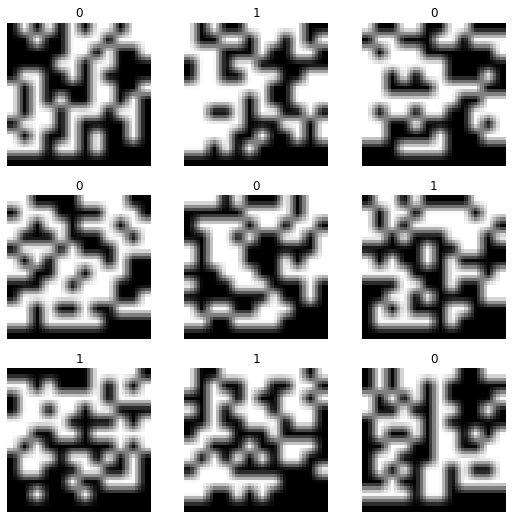

In [12]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

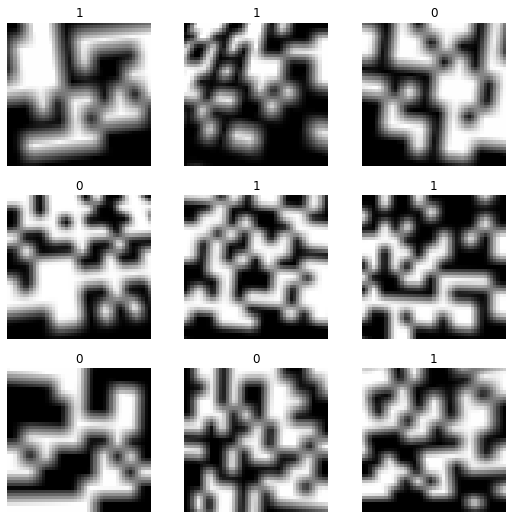

In [13]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

In [14]:
def runit(dls,architecture,epochs):
  learn = vision_learner(dls, architecture , metrics=accuracy)
  x = learn.lr_find(suggest_funcs=(slide, valley))
  lr = (x[0]+x[1])/2.0
  learn.fine_tune(epochs,lr)
  learn.show_results()
  return learn

#Densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.758672,0.750410,0.498066,02:30


epoch,train_loss,valid_loss,accuracy,time
0,0.698934,0.700291,0.500686,02:47
1,0.701516,0.711295,0.502434,02:48
2,0.706748,0.718555,0.499938,02:47
3,0.698318,0.709425,0.496693,02:44
4,0.702498,0.703242,0.501685,02:47
5,0.693711,0.706359,0.505304,02:49
6,0.687953,0.710848,0.514664,02:48
7,0.681305,0.704736,0.505054,02:46
8,0.680056,0.705528,0.508798,02:50
9,0.679201,0.707201,0.507176,02:48


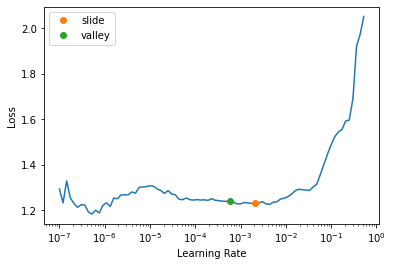

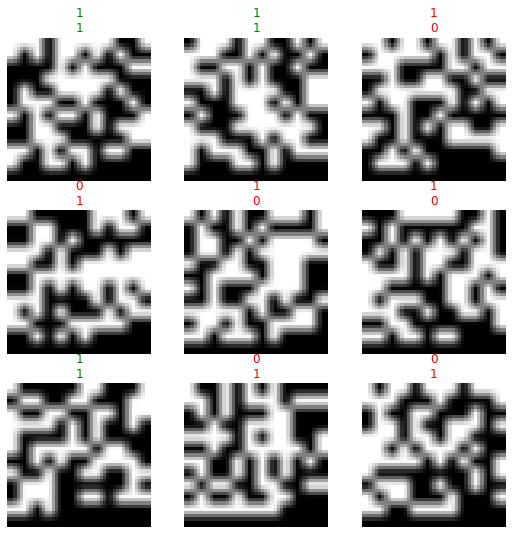

In [15]:
res_2_dense = runit(dls1, 'densenet121', 10)

epoch,train_loss,valid_loss,accuracy,time
0,0.772056,0.706784,0.509797,02:34


epoch,train_loss,valid_loss,accuracy,time
0,0.705322,0.696122,0.500686,02:47
1,0.703188,0.696844,0.501810,02:50
2,0.706237,0.708580,0.496443,02:48
3,0.703181,0.701074,0.488831,02:46
4,0.704054,0.701523,0.502558,02:50
5,0.702441,0.699078,0.494447,02:50
6,0.696913,0.696288,0.499314,02:47
7,0.694857,0.695764,0.501435,02:48
8,0.694392,0.693846,0.511544,02:49
9,0.696044,0.694121,0.503557,02:48


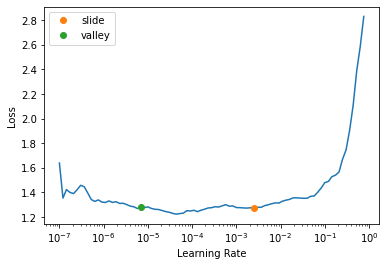

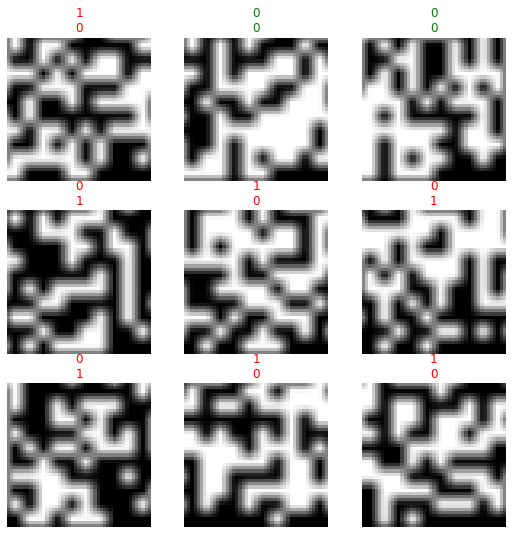

In [16]:
res_dense = runit(dls2, 'densenet121' , 10)

#DarkNet

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/darknet53_256_c2ns-3aeff817.pth" to /root/.cache/torch/hub/checkpoints/darknet53_256_c2ns-3aeff817.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.791223,0.786646,0.503307,02:07


epoch,train_loss,valid_loss,accuracy,time
0,0.706544,0.698898,0.494696,02:15
1,0.733972,0.730788,0.506926,02:11
2,0.740307,0.710563,0.511294,02:16
3,0.735070,0.767490,0.511918,02:11
4,0.716731,0.727268,0.518907,02:16
5,0.674358,0.794432,0.516785,02:13
6,0.596295,0.832973,0.518907,02:13
7,0.505675,0.904487,0.519406,02:12
8,0.420583,0.983701,0.518158,02:12
9,0.413101,0.990165,0.517035,02:15


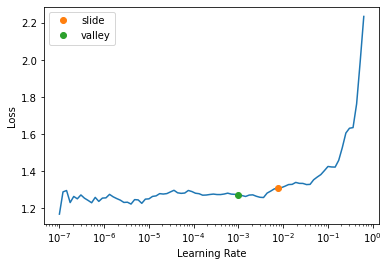

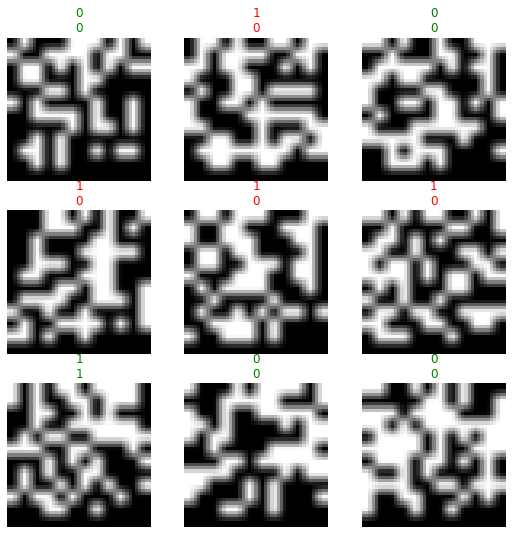

In [17]:
darknet_1 = runit(dls1, 'darknet53',10)

In [ ]:
darknet_2 = runit(dls2, 'darknet53',10)

#ConvNext

In [ ]:
convnext_1 = runit(dls1, 'convnext_nano',10)

In [ ]:
convnext_2 = runit(dls2, 'convnext_nano',10)

#pnasnet5large

In [ ]:
pnasnet1 = runit(dls1, 'pnasnet5large',10)

In [ ]:
pnasnet2 = runit(dls2, 'pnasnet5large',10)

#ResNext101_64x4d

In [ ]:
resnext1 = runit(dls1, 'resnext101_64x4d',10)

In [ ]:
resnext2 = runit(dls2, 'resnext101_64x4d',10)

#ResNet152

In [ ]:
resnet1 = runit(dls1, 'resnet152',10)

In [ ]:
resnet2 = runit(dls2, 'resnet152',10)